In [2]:

from game import Game
from minmax import Algorithms
from player import Player, MAX_NUM_OF_PIECES
from plot_utils import plot_wins, plot_times

pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Heuristic comparison
For this experiment I use two different heuristics. The first is the simplest one and is the Material Advantage evaluation. The second is the Simplified Evaluation Function (SEF)
 [explained here](https://www.chessprogramming.org/Simplified_Evaluation_Function), that is a more complex function that takes in account also other parameters such as the game phase (startgame, midgame, endgame) and values like king's safety, opponent threats, center control, mobility and pawn structure. 

 For this test, the opponent will be a player with Branching Limited MinMax (L = 2, BF = 4) that uses the simple heuristic. Then I will evaluate the win rate on 100 games of two players that uses the same algorithm and the two heuristics.

In [46]:
engine_params={"L":2,"BF":4}
NRUNS = 100

opponent = Player(color="white", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, heuristic="SEF", statistics_mode=False)

### SEF

In [47]:
game = Game(in_jupiter=True)

player_SEF = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, heuristic="SEF", statistics_mode=True)

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_SEF},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 100/100 [02:19<00:00,  1.40s/it]


### Material Advantage

In [48]:
game = Game(in_jupiter=True)

player_MA = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, heuristic="MA", statistics_mode=True)

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_MA},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


### Results

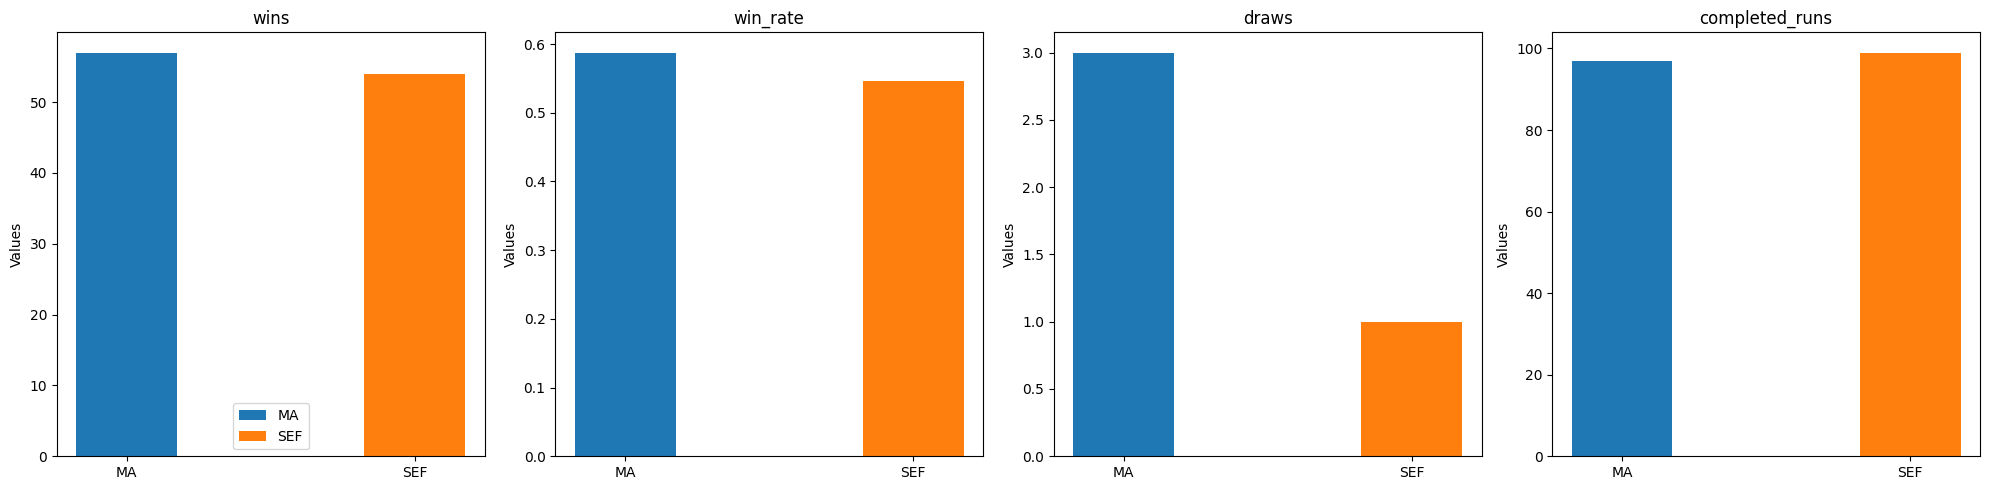

In [49]:
plot_wins([(player_MA, "MA"), (player_SEF, "SEF")])

# 1 Algorithms comparison
In this section, the goal is to compare different applications of the MinMax algorithm. In order, I will evaluate:
- MinMax
- MinMax with Alpha-Beta Pruning
- Branching Limited MinMax with Alpha-Beta Pruning 

Also for this test, I will use as opponent the white player with Material Advantage heuristic, L = 2 and Fail Soft Alpha Beta, while the player will use the SEF heuristic.

In [24]:

players_list_1 = []
NRUNS = 100

opponent = Player(color="white", algorithm=Algorithms.BRANCHING_LIMIT, heuristic="SEF", engine_params={"L": 2, "BF":5}, statistics_mode=False)

In [55]:
game = Game(in_jupiter=True)

player_MinMax = Player(color="black", algorithm=Algorithms.MIN_MAX, engine_params={"L":2}, heuristic="SEF", statistics_mode=True)
players_list_1.append((player_MinMax, "MinMax"))

game.start_in_statistics_mode(
    nruns=int(NRUNS),
    ai_players={"white": opponent, "black": player_MinMax},
    random_configuration_steps=20,
    plot=False
)

player_MinMax.move_to_the_board = {}

Running games: 100%|██████████| 100/100 [27:04<00:00, 16.25s/it]


In [26]:
game = Game(in_jupiter=True)

player_FSABMinMax = Player(color="black", algorithm=Algorithms.FAIL_SOFT_ALPHA_BETA, engine_params={"L":2}, heuristic="SEF", statistics_mode=True)
players_list_1.append((player_FSABMinMax, "FSABMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_FSABMinMax},
    random_configuration_steps=20,
    plot=False
)

player_FSABMinMax.move_to_the_board = {}

Running games: 100%|██████████| 100/100 [09:32<00:00,  5.73s/it]


In [27]:
game = Game(in_jupiter=True)

player_FHABMinMax = Player(color="black", algorithm=Algorithms.FAIL_HARD_ALPHA_BETA, engine_params={"L":2}, heuristic="SEF", statistics_mode=True)
players_list_1.append((player_FHABMinMax, "FHABMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_FHABMinMax},
    random_configuration_steps=20,
    plot=False
)

player_FHABMinMax.move_to_the_board = {}

Running games: 100%|██████████| 100/100 [13:47<00:00,  8.27s/it]


In [28]:
game = Game(in_jupiter=True)

player_BLMinMax = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={"L":2, "BF": 4, "l":0}, heuristic="SEF", statistics_mode=True)
players_list_1.append((player_BLMinMax, "BLMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_BLMinMax},
    random_configuration_steps=20,
    plot=False
)

player_BLMinMax.move_to_the_board = {}

Running games: 100%|██████████| 100/100 [02:36<00:00,  1.57s/it]


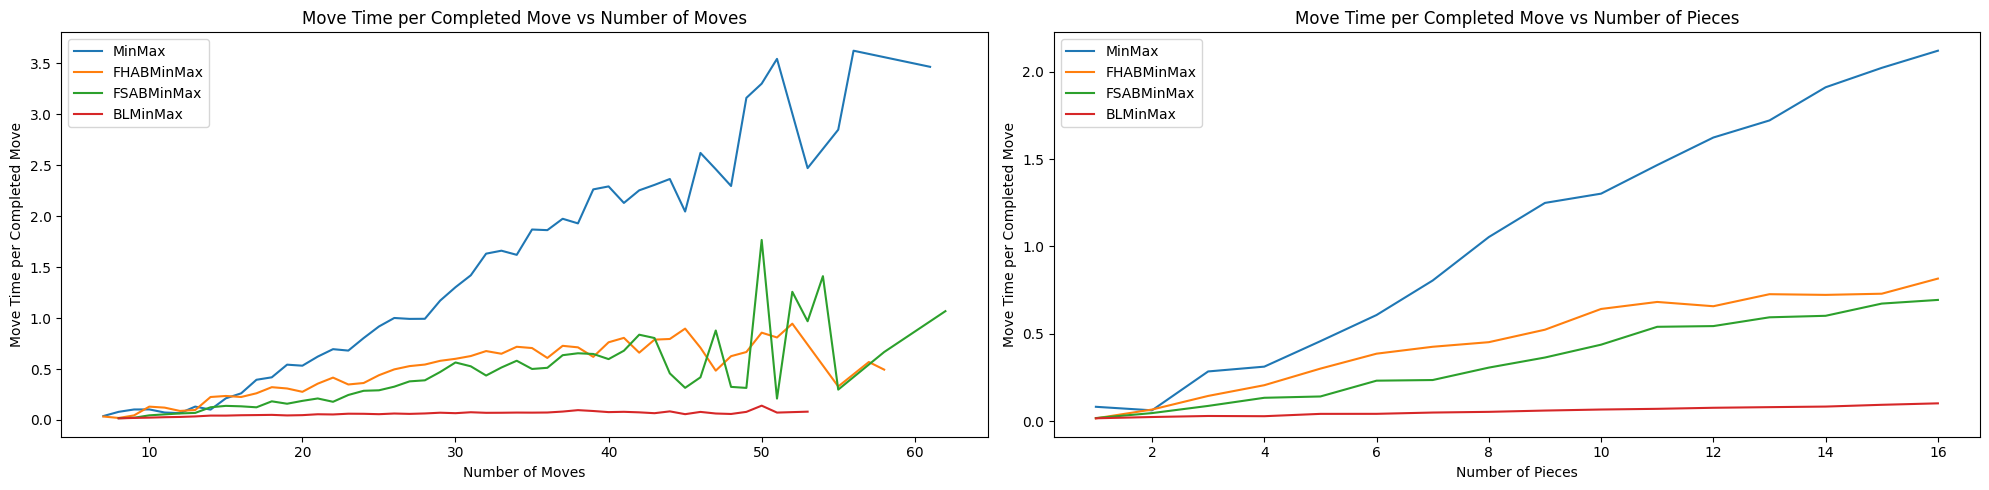

In [59]:
plot_times(players_list_1)

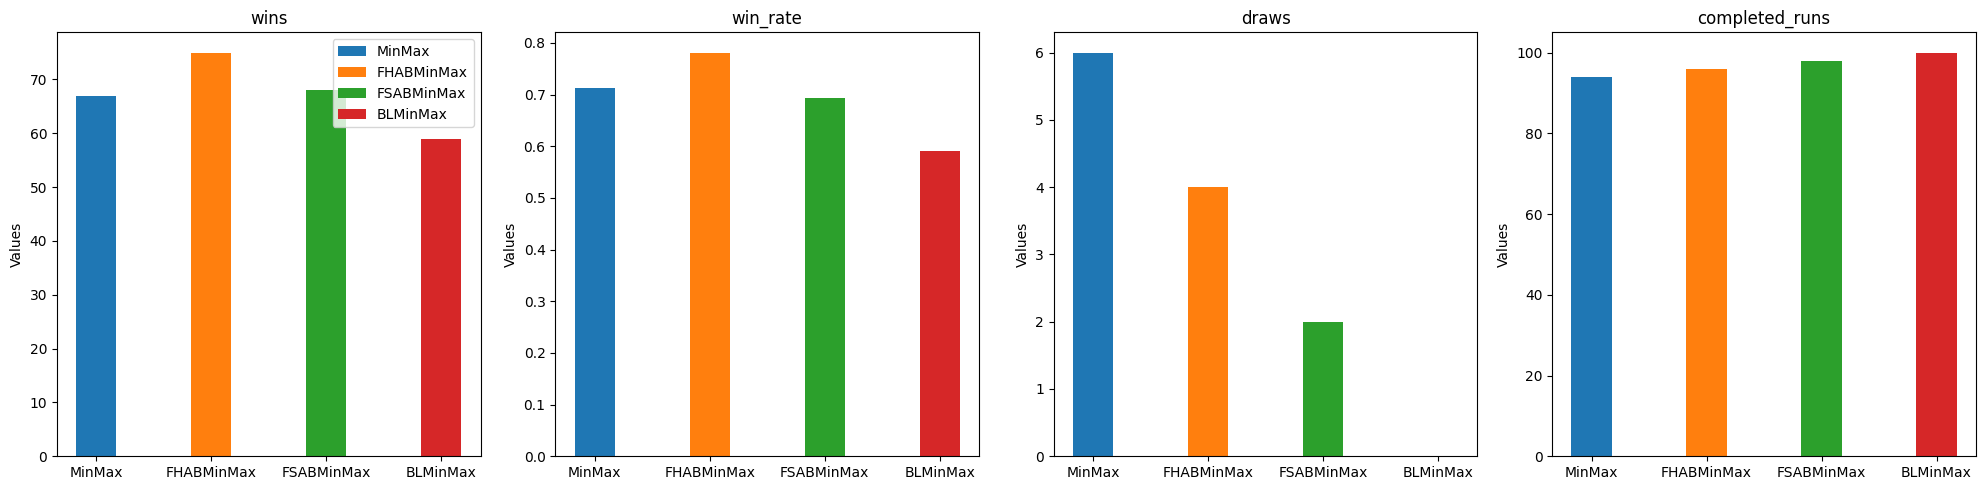

In [60]:
plot_wins(players_list_1)

## 2. blMinMaxl

In [13]:
L = 4
NRUNS = 100

players_list_2 = []
for l in range(L):
    game = Game(in_jupiter=True)
    player_BLMinMaxl = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={
                             "L": L, "BF": 2, "l": l}, heuristic="SEF", statistics_mode=True)
    players_list_2.append((player_BLMinMaxl, f"BLMinMax_l{l}"))

    game.start_in_statistics_mode(
        nruns=NRUNS,
        ai_players={"white": opponent, "black": player_BLMinMaxl},
        random_configuration_steps=20,
        plot=False
    )

Running games: 100%|██████████| 100/100 [1:49:45<00:00, 65.85s/it]


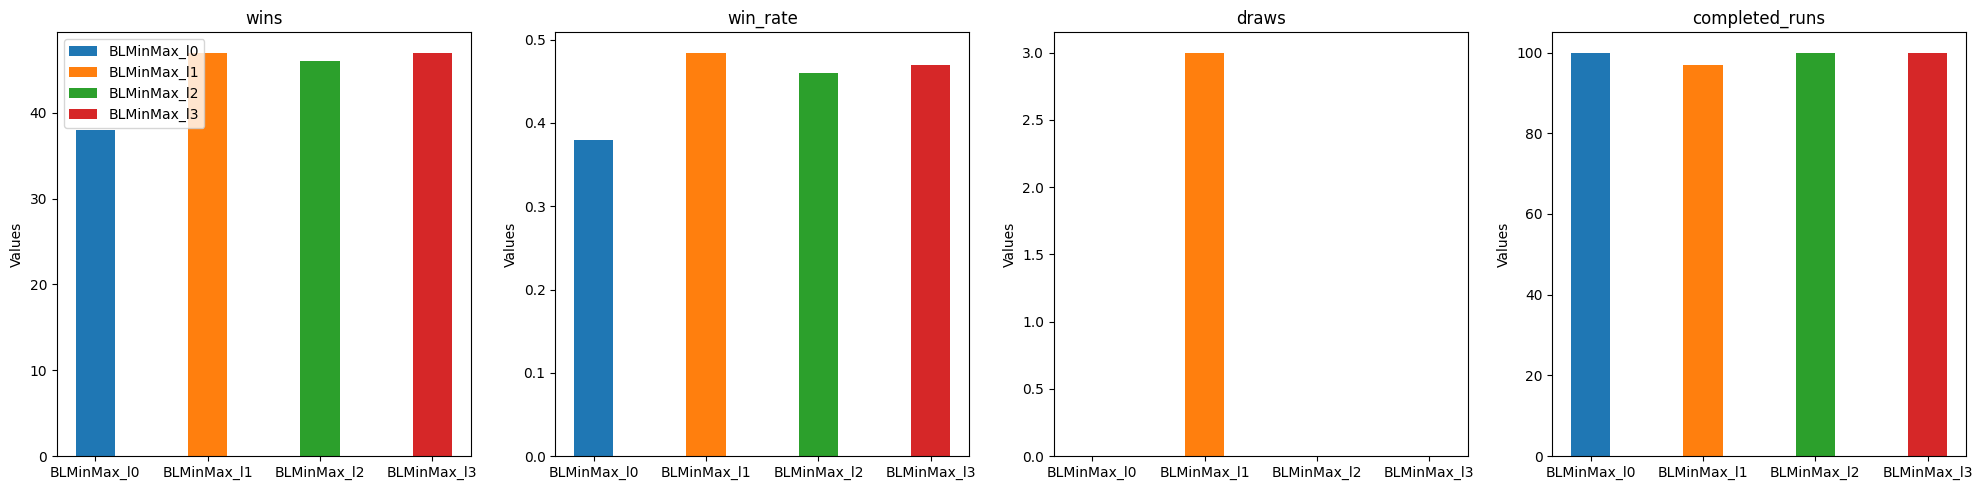

In [14]:
plot_wins(players_list_2)

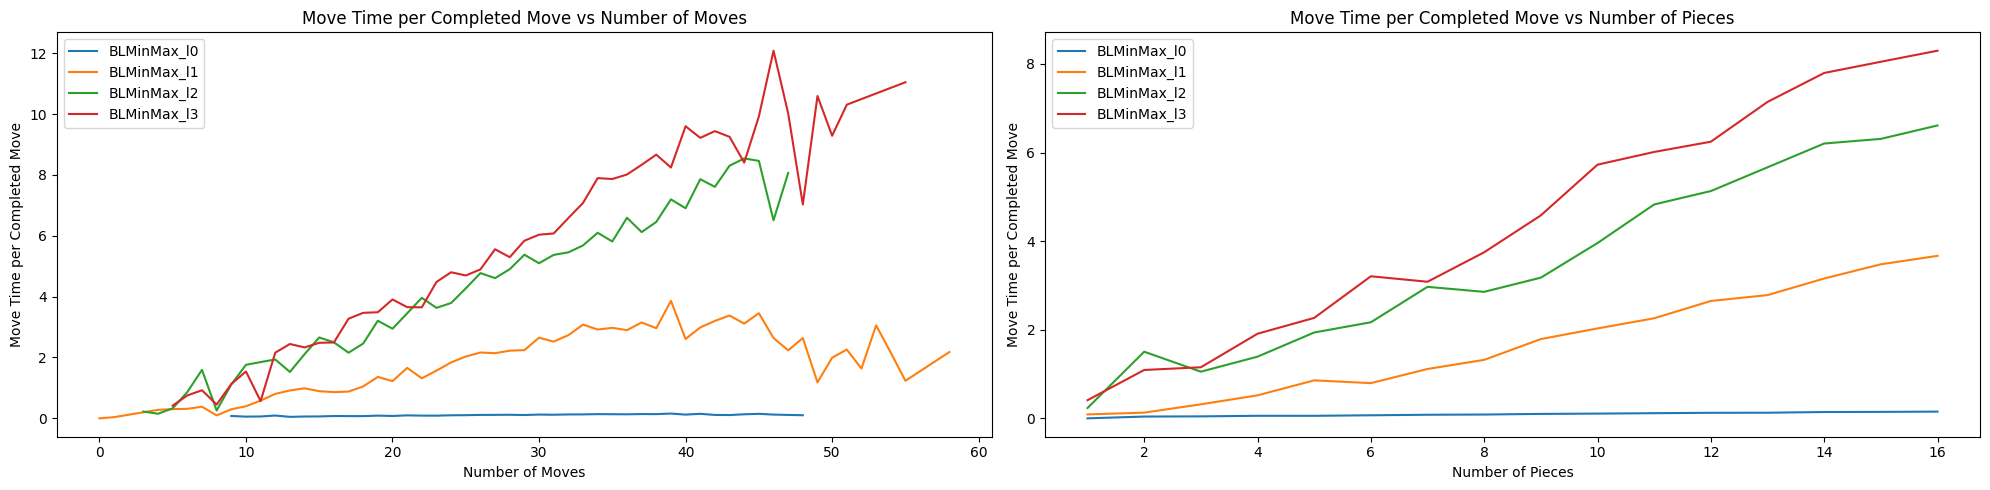

In [15]:
plot_times(players_list_2)

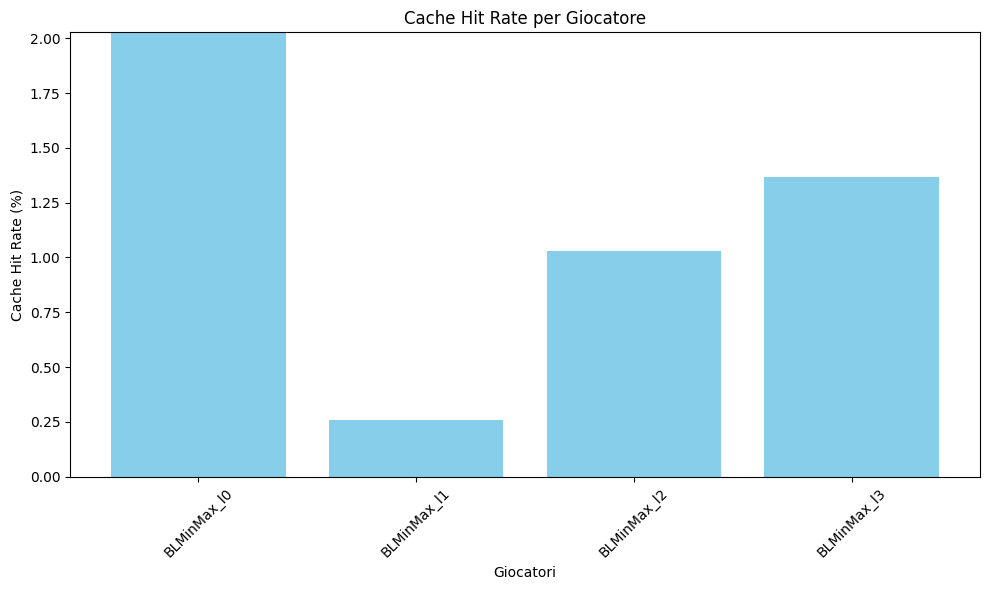

In [16]:
from matplotlib import pyplot as plt

# Liste per i nomi dei giocatori e i rispettivi cache hit rate
player_names = []
cache_hit_rates = []

# Calcola il cache hit rate per ogni giocatore
for player, name in players_list_2:
    cache_hits = player.engine.cache_hits
    hits = player.engine.hits
    # Evita divisioni per zero
    if hits > 0:
        hit_rate = (cache_hits / hits) * 100  # Calcola la percentuale
    else:
        hit_rate = 0
    player_names.append(name)
    cache_hit_rates.append(hit_rate)

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(player_names, cache_hit_rates, color='skyblue')
plt.xlabel('Giocatori')
plt.ylabel('Cache Hit Rate (%)')
plt.title('Cache Hit Rate per Giocatore')
plt.xticks(rotation=45)
plt.ylim(0, max(cache_hit_rates))  # Supponendo che il tasso sia una percentuale tra 0 e 100
plt.tight_layout()
plt.show()

# 3 and 4. predBLMinMaxl

In [7]:
NRUNS = 100

engine_params = {"L": 2}
opponent = Player(color="white", algorithm=Algorithms.FAIL_SOFT_ALPHA_BETA, engine_params=engine_params, heuristic="MA", statistics_mode=False)

game = Game(in_jupiter=True)
player_pred = Player(color="black", algorithm=Algorithms.PRED_BLMINMAX, heuristic="SEF", engine_params={}, statistics_mode=True)
players_list_3 = [(player_pred, f"Pred")]

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_pred},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 100/100 [10:07<00:00,  6.07s/it]


In [8]:
game = Game(in_jupiter=True)
player_pred_mi = Player(color="black", algorithm=Algorithms.MULTI_INPUT_PRED_BLMINMAX, heuristic="SEF", engine_params={}, statistics_mode=True)
players_list_3.append((player_pred_mi, f"Pred MI"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_pred_mi},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 100/100 [05:00<00:00,  3.00s/it]


In [29]:
game = Game(in_jupiter=True)
player_bl = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, heuristic="SEF", engine_params={"L":4, "BF":2, "l":1 }, statistics_mode=True)
players_list_3.append((player_bl, f"BL"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_bl},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 100/100 [41:43<00:00, 25.03s/it]


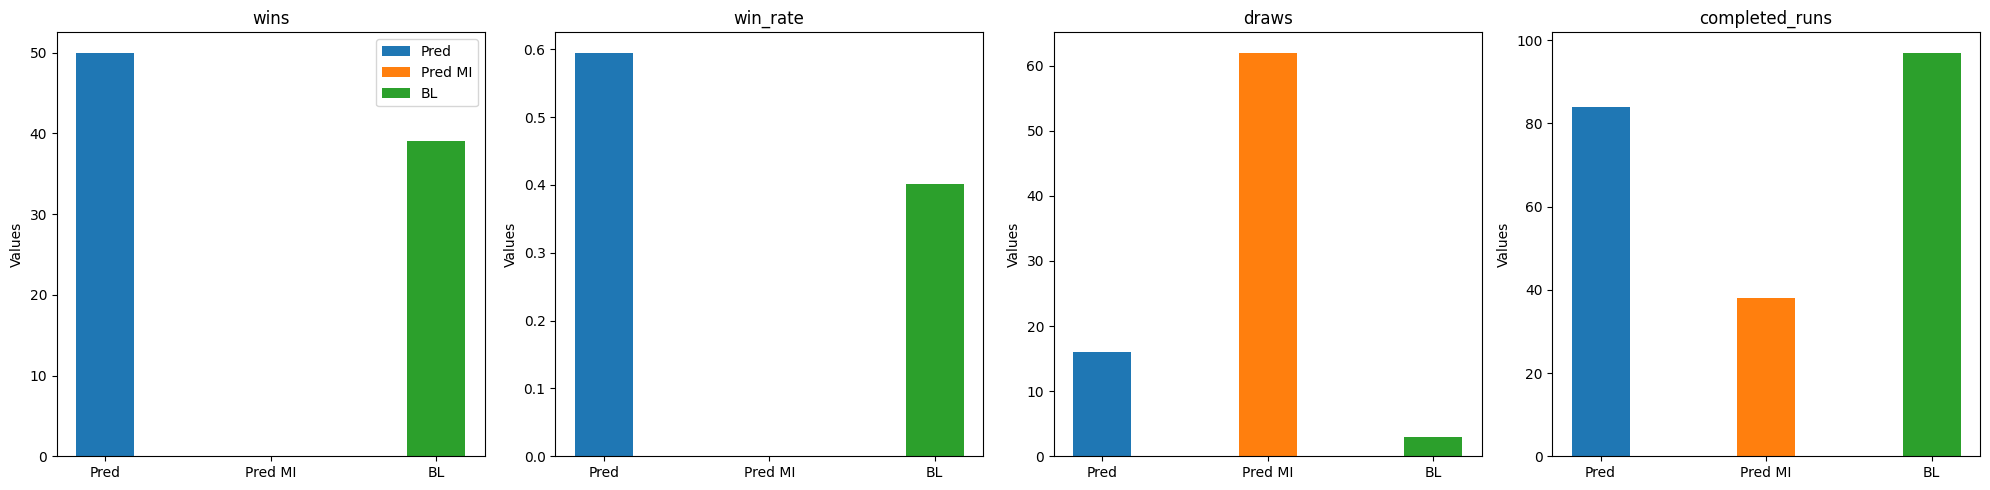

In [36]:
plot_wins(players_list_3)

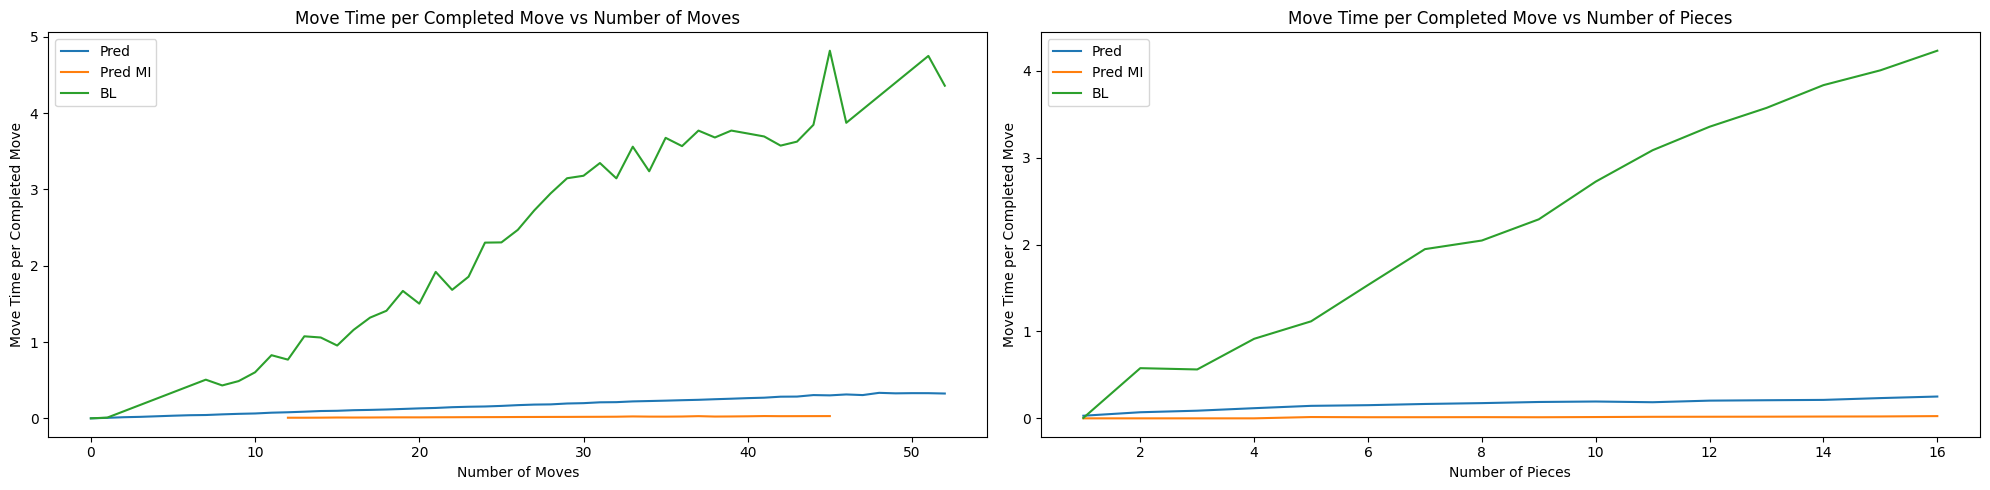

In [37]:
plot_times(players_list_3)

# Play a game versus AI

To play a game versus the AI execute the `main.py` file. There is a little bug, the AI pawn can eat also in front... I found out this behaviour only in the last stages, but it can be considered a different version of chess..😅